In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib as plt


In [ ]:
df=pd.read_csv("loan_approval_data.csv")
df
#

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,NaN,9092.0,Salaried,58.0,Married,0.0,557.0,0.0,0.59,5370.0,43563.0,8311.0,72.0,Personal,NaN,Not Graduate,Male,Unemployed,No
996,997.0,3279.0,6356.0,Self-employed,58.0,Married,1.0,646.0,3.0,0.19,NaN,18361.0,22563.0,12.0,Business,Urban,Graduate,Female,Government,No
997,998.0,15192.0,8433.0,Contract,48.0,Single,1.0,666.0,1.0,0.40,8581.0,41335.0,16203.0,24.0,Home,Rural,Graduate,Male,MNC,No
998,999.0,9083.0,7380.0,Unemployed,50.0,Single,1.0,748.0,3.0,0.31,13491.0,8933.0,10290.0,36.0,Personal,Urban,Graduate,Male,Private,Yes


In [3]:
#first step we do is to handle null values
# for numerical data we do the mean and put it in mean value
# for categorical data we do the mode and put it in maean value

# first step we do is to handle null values
# for numerical data we do the mean and put it in mean value
# for categorical data we do the mode and put it in maean value

In [32]:
cat_col=df.select_dtypes(include=["object"]).columns
num_col=df.select_dtypes(include=["float64","int32"]).columns
cat_col

Index([], dtype='object')

In [33]:
from sklearn.impute import SimpleImputer

num_imp=SimpleImputer(strategy="mean")

df[num_col]=num_imp.fit_transform(df[num_col])
cat_imp=SimpleImputer(strategy="most_frequent")
df[cat_col]=cat_imp.fit_transform(df[cat_col])

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

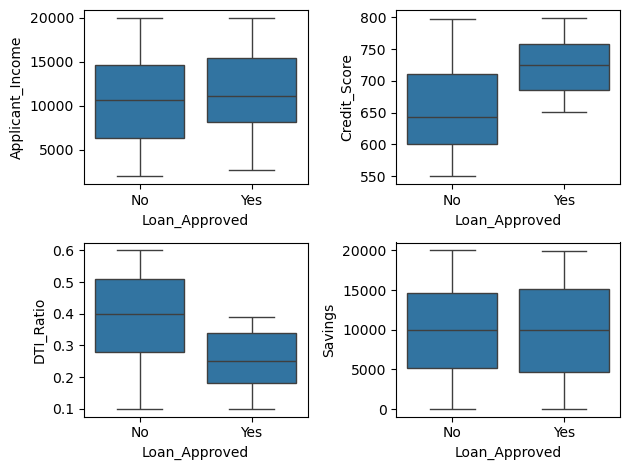

In [21]:
import matplotlib.pyplot as plt
fig,axis=plt.subplots(2,2)
sns.boxplot(ax=axis[0,0],data=df,x="Loan_Approved",y="Applicant_Income")
sns.boxplot(ax=axis[0,1],data=df,x="Loan_Approved",y="Credit_Score")
sns.boxplot(ax=axis[1,0],data=df,x="Loan_Approved",y="DTI_Ratio")
sns.boxplot(ax=axis[1,1],data=df,x="Loan_Approved",y="Savings")


plt.tight_layout()


In [34]:
#feature encoding 

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
df["Education_Level"]=le.fit_transform(df["Education_Level"])
df["Loan_Approved"]=le.fit_transform(df["Loan_Approved"])

In [35]:
cols=["Employment_Status","Marital_Status","Loan_Purpose","Property_Area","Gender" ,"Employer_Category"]
ohe=OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore")

enc=ohe.fit_transform(df[cols])
enc_df=pd.DataFrame(enc)
df=pd.concat([df.drop(columns=cols),enc_df],axis=1)

KeyError: "None of [Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',\n       'Gender', 'Employer_Category'],\n      dtype='object')] are in the [columns]"

In [25]:
df

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,...,5,6,7,8,9,10,11,12,13,14
0,1.0,17795.000000,1387.0,51.0,0.0,637.0,4.0,0.53,19403.000000,45638.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,2860.000000,2679.0,46.0,3.0,621.0,2.0,0.30,2580.000000,49272.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3.0,7390.000000,2106.0,25.0,2.0,674.0,4.0,0.20,13844.000000,6908.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4.0,13964.000000,8173.0,40.0,2.0,579.0,3.0,0.31,9553.000000,10844.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,13284.000000,4223.0,31.0,2.0,721.0,1.0,0.29,9386.000000,37629.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,10852.571579,9092.0,58.0,0.0,557.0,0.0,0.59,5370.000000,43563.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
996,997.0,3279.000000,6356.0,58.0,1.0,646.0,3.0,0.19,9940.452632,18361.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
997,998.0,15192.000000,8433.0,48.0,1.0,666.0,1.0,0.40,8581.000000,41335.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
998,999.0,9083.000000,7380.0,50.0,1.0,748.0,3.0,0.31,13491.000000,8933.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [44]:
from sklearn.preprocessing import StandardScaler
X=df.drop("Loan_Approved",axis=1)
y=df["Loan_Approved"]
X.columns = X.columns.astype(str)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()

num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.715
0.5769230769230769
0.2459016393442623


c:\Users\suyas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.635
0.3333333333333333
0.19672131147540983
